<h1>Health Care Charges EDA and Model for Prediction</h1>

<hr />

<h2>Table of Contents</h2>

1. [Description](#1)
2. [Objective](#2)
3. [Import Libraries](#3)
4. [Import Data](#4)
5. [EDA](#5)
6. [Visulize the Dataset](#6)
7. [Statistics](#7)
8. [Building a Model](#8)
9. [Final Model](#9)
10. [Conclusions](#10)
11. [References and Attitution](#11)

<hr />

<a id = '1'> </a><h2>Description</h2>

<p>
A spreadsheet of cleaned data for health care charges for a group of insured persons has been provided. The data scientist has been tasked with determining if a model can be created for predicting the charges a person will incur based on several variables of the person.</p>
<p>This data consists of 7 variables. This notebook will use the "Charges" as the target to predict. It will use the other 6 variables to attempt to predict the charges of the insured person. 
</p>
<ul>
    <li><b>Age:</b> Current age of the insured person. </li>
    <li><b>Sex:</b> Sex of the insured person. </li>
    <li><b>BMI:</b> The body mass index of the insured person. An indicator of possible health status based on height and weight </li>
        <ul>
            <li><b>Underweight</b> < 18.5</li>
            <li><b>Normal</b> 18.5-24.9</li>
            <li><b>Overweight</b> 25.0-29.9</li>
            <li><b>Obese</b> >= 30.0</li> 
        </ul>
    <li><b>Children:</b> Number of children the insured person has. </li>
    <li><b>Smoker:</b> Current smoker status of the insured person. </li>
    <li><b>Region:</b> Current region of the insured person. </li>
    <li><b>Charges:</b> Health Care Billed Charges for the insured person. </li>
</ul>


<hr />

<a id = '2'> </a><h2>Objective</h2>

<p>The objective is to use the given variables and attempt to create model capable of predicting the health care charges that person with a given set of attributes will incur. This data model will be useful in determining risk and determine the premiums that should be charged. </p>

<b>Strategy</b>
<ol>
    <li>Split the data to avoid snooping bias.</li>
    <li>Explore the training set.</li>
    <li>Visualize the data to find patterns.</li>
    <li>Explore and build various models and select the best strategy. </li>
    <li>Select a final model and save this model for future use. </li>
    <li>As more data is collected improve the model or build a different model.</li>
</ol>


<hr />

<a id = '3'></a><h2>Import the Needed Libraries</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylab
from sklearn.preprocessing import MinMaxScaler,RobustScaler,\
                                    OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,\
                            r2_score,mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import f_oneway
from scipy.optimize import basinhopping
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

<hr />

<a id = '4'> </a><h2>Import the Data</h2>

In [2]:
HEALTH_CARE_DATA = "insurance.csv"

In [3]:
def load_health_data(data_path = HEALTH_CARE_DATA):
    return pd.read_csv(data_path)

<hr />

<a id = '5'> </a><h2>EDA</h2>

In [4]:
health_care_data_full = load_health_data()
health_care_data_full.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<p>General Information about the dataset. </p>
<p>Note that the dataset it not missing values and appears to have been cleaned already.</p>

In [5]:
health_care_data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Checking what categories exist for region and the counts.

In [6]:
health_care_data_full['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Checking how many smokers and non-smokers exist in the data.

In [7]:
health_care_data_full['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Check number of male/female counts

In [8]:
health_care_data_full['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

Checking counts of number of children.

In [9]:
health_care_data_full['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Looking at statistical data of the dataset.

In [10]:
health_care_data_full.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Histograms of the dataset for the numerical data.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

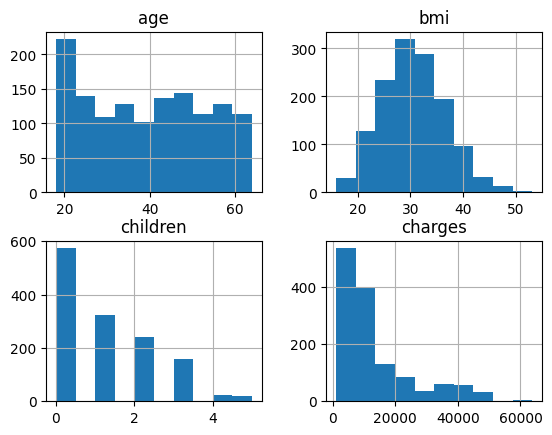

In [11]:
health_care_data_full.hist()

<h3>Splitting The Data To Avoid Snooping Bias</h3>
<b>Here we want to make sure to pull a test set out to avoid any type of "Data Snooping Bias". Then we want to make sure we pull out a good representation of the data set.</b>

Create bins for the "charges" data target variable.

<Axes: >

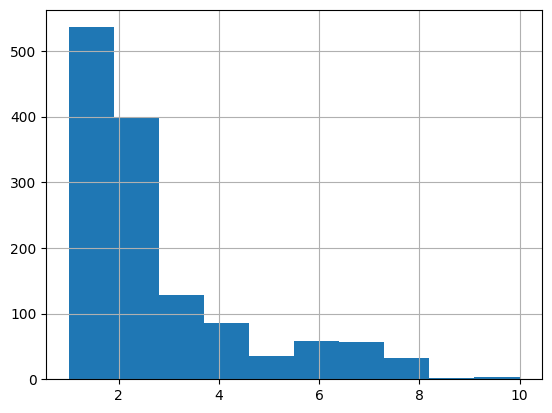

In [12]:
health_care_data_full = load_health_data()
health_care_data_full['charge_cat'] = pd.cut(health_care_data_full['charges'],10,labels = [1,2,3,4,5,6,7,8,9,10])
health_care_data_full
health_care_data_full['charge_cat'].hist()

Split the data set, but use stratified shuffle split in order to get a good representation of the data set.

In [13]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 0)
for train_index,test_index in split.split(health_care_data_full,health_care_data_full['charge_cat']):
    strat_train_set = health_care_data_full.loc[train_index]
    strat_test_set = health_care_data_full.loc[test_index]

Compare the bins of the split dataset to the bins of the total dataset to see if it is a good representation of the data set.

In [14]:
bin_t = strat_test_set["charge_cat"].value_counts()/len(strat_test_set)
bin_f = health_care_data_full["charge_cat"].value_counts()/len(health_care_data_full)
bin_com_df = pd.DataFrame(
    {'Test Bins': bin_t,
     'Full Bins': bin_f
    })
bin_com_df

,Test Bins,Full Bins
charge_cat,,
1,0.399254,0.400598
2,0.298507,0.297459
3,0.097015,0.096413
4,0.063433,0.064275
6,0.044776,0.044096
7,0.044776,0.042601
5,0.026119,0.026158
8,0.022388,0.023916
10,0.003731,0.002990


In [15]:
# Remove the bins we created. 
for set_ in (strat_train_set,strat_test_set):
    set_.drop("charge_cat",axis = 1, inplace = True)

Look at the top rows of our split (training dataset)

In [16]:
strat_train_set.head()

,age,sex,bmi,children,smoker,region,charges
109,63,male,35.09,0,yes,southeast,47055.5321
1136,44,female,25.00,1,no,southwest,7623.5180
184,44,male,30.69,2,no,southeast,7731.4271
1053,47,male,29.80,3,yes,southwest,25309.4890
591,47,male,19.57,1,no,northwest,8428.0693


Set our strat_train_set to variable named health_care_data

In [17]:
health_care_data = strat_train_set.copy()

In [18]:
t_smoker = health_care_data[health_care_data['smoker']=='yes']
t_non_smoker = health_care_data[health_care_data['smoker']=='no']

Taking a look at the split of male vs female smokers and non-smokers. Note there are more male smokers. 

In [19]:
print("SMOKERS")
print(t_smoker['sex'].value_counts())
print("Non_Smokers")
print(t_non_smoker['sex'].value_counts())

SMOKERS
sex
male      128
female     93
Name: count, dtype: int64
Non_Smokers
sex
female    443
male      406
Name: count, dtype: int64


Looking at smoker and non-smokers by region. Note more smokers in the southeast. 

In [20]:
print("SMOKERS")
print(t_smoker['region'].value_counts())
print("Non_Smokers")
print(t_non_smoker['region'].value_counts())

SMOKERS
region
southeast    76
northeast    53
northwest    48
southwest    44
Name: count, dtype: int64
Non_Smokers
region
northwest    219
southeast    216
southwest    207
northeast    207
Name: count, dtype: int64


Looking at some average charges of the groups. A deeper dive will be done with this later on. 

In [21]:
print("Average smoker charges $" + str(round(np.mean(health_care_data[health_care_data['smoker']=='yes']['charges']),2)))
print("Average Non-Smoker charges $" + str(round(np.mean(health_care_data[health_care_data['smoker']=='no']['charges']),2)))

print("Average male charges $" + str(round(np.mean(health_care_data[health_care_data['sex']=='male']['charges']),2)))
print("Average female charges $" + str(round(np.mean(health_care_data[health_care_data['sex']=='female']['charges']),2)))

print("Average southeast charges $" + str(round(np.mean(health_care_data[health_care_data['region']=='southeast']['charges']),2)))
print("Average southwest charges $" + str(round(np.mean(health_care_data[health_care_data['region']=='southwest']['charges']),2)))
print("Average northwest charges $" + str(round(np.mean(health_care_data[health_care_data['region']=='northwest']['charges']),2)))
print("Average northeast charges $" + str(round(np.mean(health_care_data[health_care_data['region']=='northeast']['charges']),2)))

print("Average 0 children charges $" + str(round(np.mean(health_care_data[health_care_data['children']==0]['charges']),2)))
print("Average 1 child charges $" + str(round(np.mean(health_care_data[health_care_data['children']==1]['charges']),2)))
print("Average 2 children charges $" + str(round(np.mean(health_care_data[health_care_data['children']==2]['charges']),2)))
print("Average 3 children charges $" + str(round(np.mean(health_care_data[health_care_data['children']==3]['charges']),2)))
print("Average 4 children charges $" + str(round(np.mean(health_care_data[health_care_data['children']==4]['charges']),2)))
print("Average 5 children charges $" + str(round(np.mean(health_care_data[health_care_data['children']==5]['charges']),2)))


Average smoker charges $31858.17
Average Non-Smoker charges $8451.39
Average male charges $13964.43
Average female charges $12609.85
Average southeast charges $15056.7
Average southwest charges $12372.06
Average northwest charges $12397.58
Average northeast charges $13091.48
Average 0 children charges $12283.26
Average 1 child charges $13002.95
Average 2 children charges $15392.01
Average 3 children charges $14203.28
Average 4 children charges $15106.42
Average 5 children charges $9342.41


<b>Notes and Observations</b>
<ul>
    <li><b>There are more male than female smokers.</b></li>
    <li><b>There are smokers in the east, especially the southeast.</b></li>
    <li><b>Charges appear to be much higher for smokers.</b></li>
    <li><b>We also see some higher charges in the groups with higher smokers (southeast and males).</b></li>
</ul>

<a id = '6'></a><h2>Visualize The Data Set</h2>

<h3>Histograms</h3>

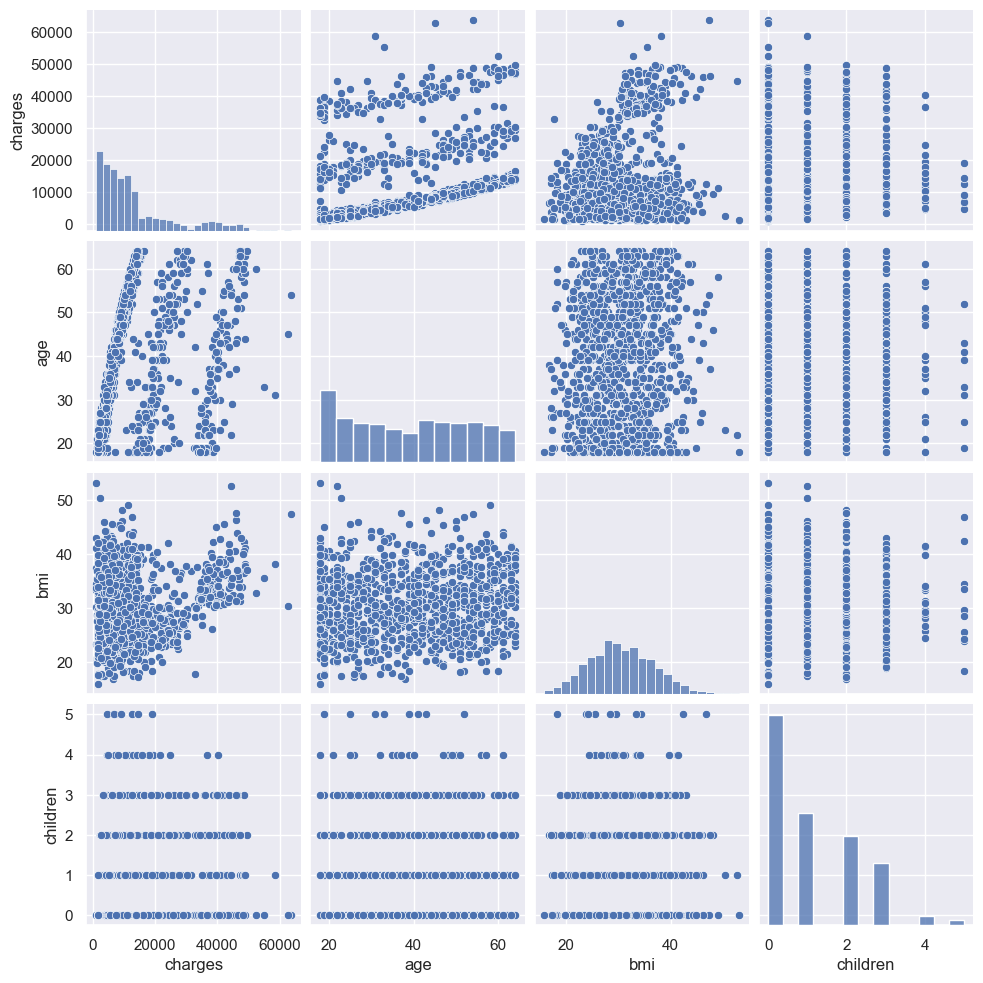

In [22]:
sns.set()
cols = ['charges', 'age' , 'bmi', 'children','sex']
sns.pairplot(health_care_data[cols], height = 2.5)
#plt.title("
plt.show();

<h4>Histograms with smoker hue</h4>

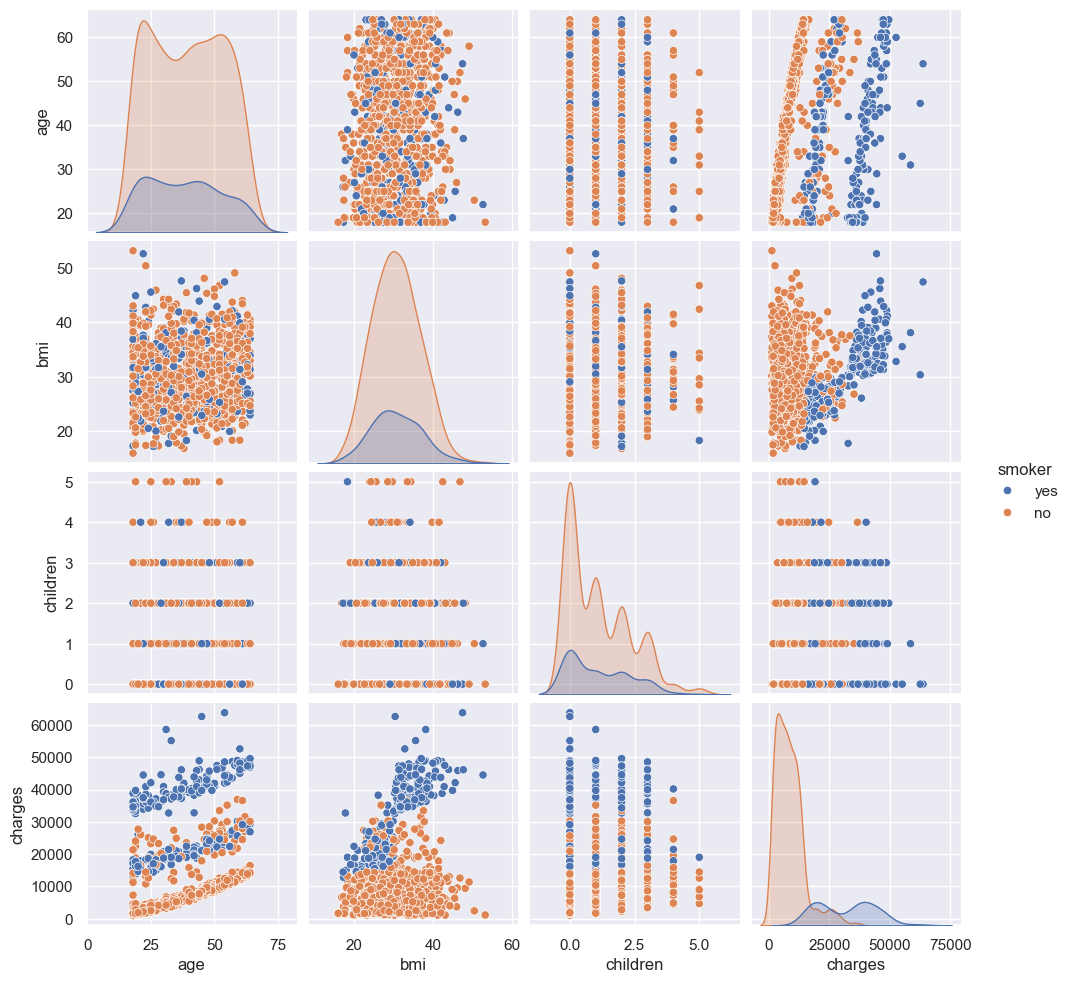

In [23]:
sns.pairplot(data=health_care_data,hue='smoker')

<h4>Histograms with sex hue</h4>

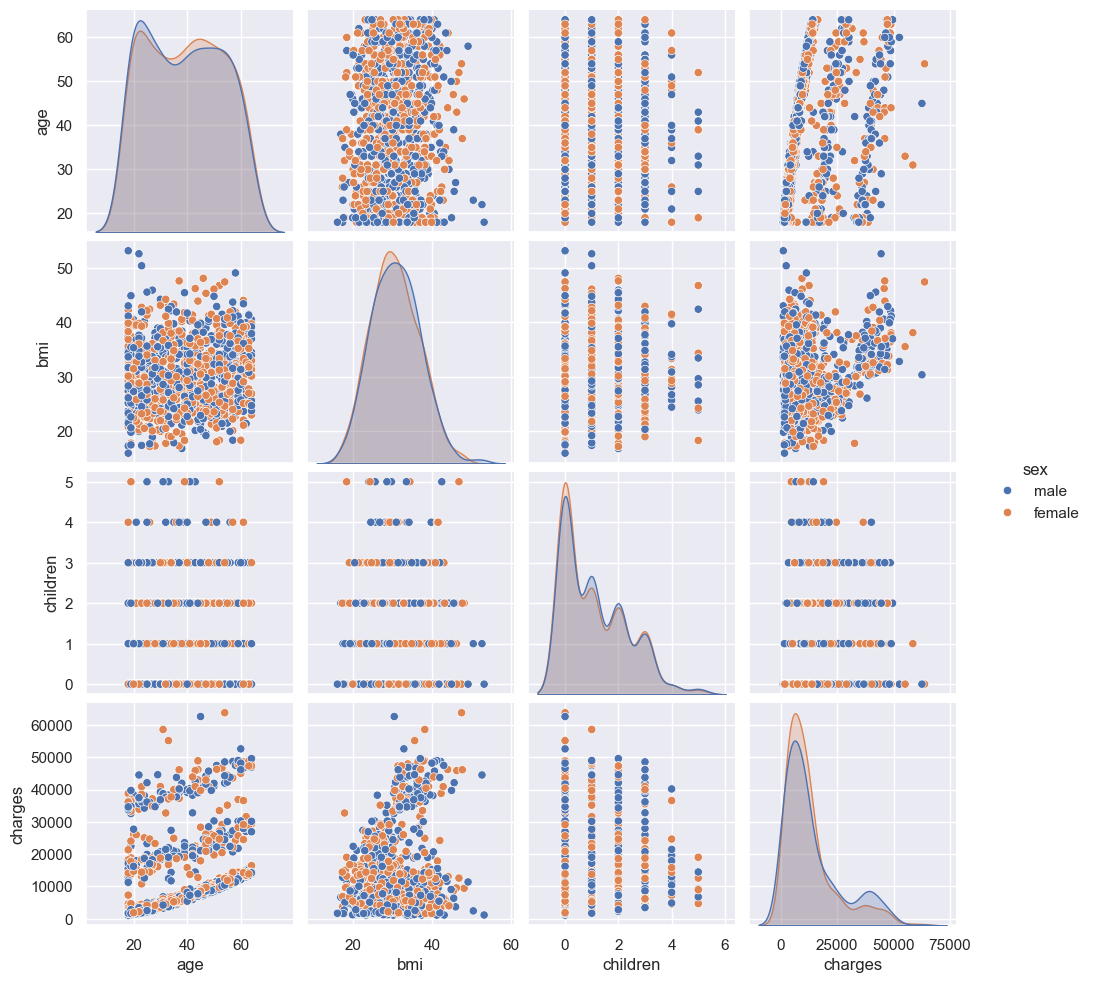

In [24]:
sns.pairplot(data=health_care_data,hue='sex')

<h4>Scatter plot Age vs charges with smoker hue</h4>

This graph was interesting as it shows a clear distinction of smoker and non smoker charges by age. 

[Text(0.5, 1.0, 'Age and Charges along with smoker hue')]

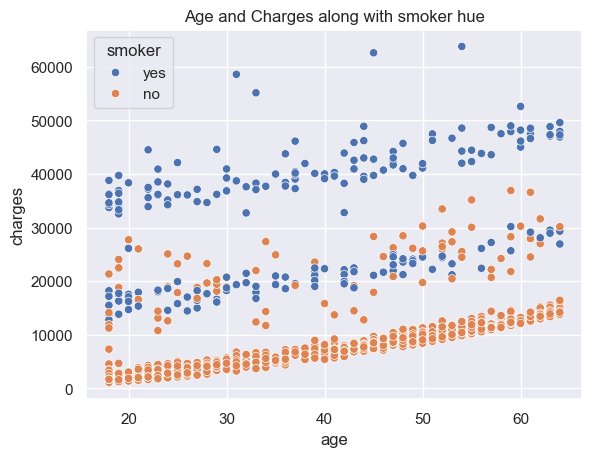

In [25]:
sns.scatterplot(data = health_care_data,x='age', y='charges', hue='smoker').set(title = "Age and Charges along with smoker hue")

<h4>Scatter plot bmi vs charge with smoker hue</h4>

Scatter plot BMI vs charges with smoker hue. Also interesting because it shows a correlation for smokers as BMI increases but not really in non-smokers.

[Text(0.5, 1.0, 'bmi and Charges along with smoker hue')]

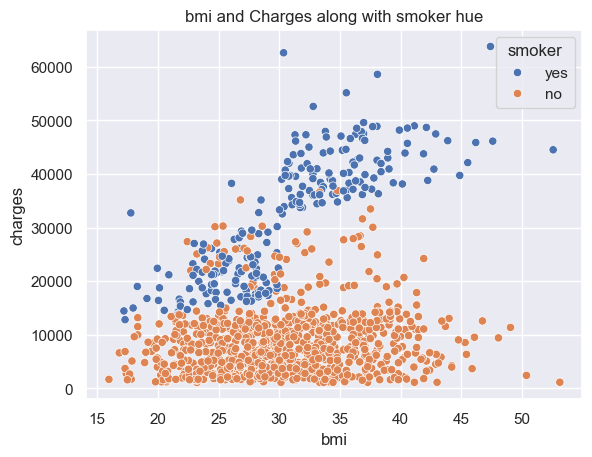

In [26]:
sns.scatterplot(data = health_care_data,x='bmi', y='charges', hue='smoker').set(title = "bmi and Charges along with smoker hue")

<h4>Scatter plot bmi vs charges on smooker only data set</h4>

Looking at scatter plot of BMI vs charges, with smoker only. I pulled out the smokers to get a better look. A moderate correlation appears with a r-squared of 0.65

 
1471 x - 1.344e+04
R Squared 0.6481856881394465


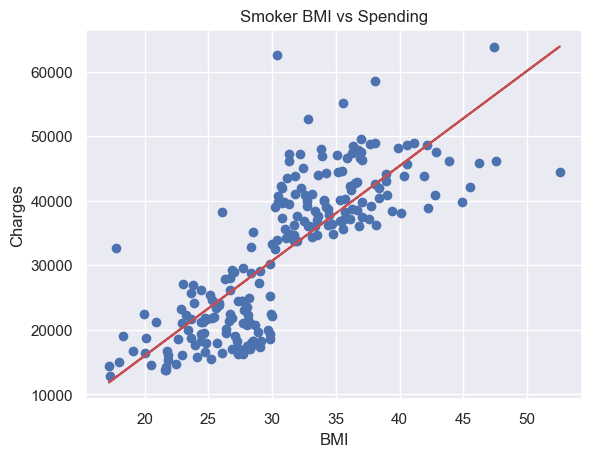

In [27]:
dataset_non_smoker = health_care_data[health_care_data['smoker']=='no']
dataset_smoker = health_care_data[health_care_data['smoker']=='yes']
dataset_obese = health_care_data[health_care_data['bmi']>=30]
dataset_not_obese = health_care_data[health_care_data['bmi']<30]
dataset_obese_smoker = dataset_smoker[dataset_smoker['bmi']>=30]
dataset_not_obese_non_smoker = dataset_non_smoker[dataset_non_smoker['bmi']<30]

plt.scatter(health_care_data[health_care_data['smoker']=='yes']['bmi'],  health_care_data[health_care_data['smoker']=='yes']['charges']  )
z = np.polyfit(health_care_data[health_care_data['smoker']=='yes']['bmi'], health_care_data[health_care_data['smoker']=='yes']['charges'], 1)
p = np.poly1d(z)
plt.plot(health_care_data[health_care_data['smoker']=='yes']['bmi'], p(health_care_data[health_care_data['smoker']=='yes']['bmi']),'r')
plt.title('Smoker BMI vs Spending')
plt.xlabel('BMI')
plt.ylabel('Charges')
print(p)
corr_matrix = np.corrcoef(health_care_data[health_care_data['smoker']=='yes']['charges'], p(health_care_data[health_care_data['smoker']=='yes']['bmi']))
corr = corr_matrix[0,1]
R_sq = corr**2
 
print("R Squared " + str(R_sq))

In [28]:
dataset_non_smoker = health_care_data[health_care_data['smoker']=='no']
dataset_smoker = health_care_data[health_care_data['smoker']=='yes']
dataset_obese = health_care_data[health_care_data['bmi']>=30]
dataset_not_obese = health_care_data[health_care_data['bmi']<30]
dataset_obese_smoker = dataset_smoker[dataset_smoker['bmi']>=30]
dataset_not_obese_non_smoker = dataset_non_smoker[dataset_non_smoker['bmi']<30]

<h4>Plotting Age vs Charges with a hue splitting between various groups (See Legend)</h4>

 
274.1 x + 3.082e+04
R Squared 0.4318225145290897
 
253.1 x + 1.173e+04
R Squared 0.5222165640840767
 
268.4 x - 2175
R Squared 0.38234794923160015


Text(0.5, 1.0, 'Spending by Group')

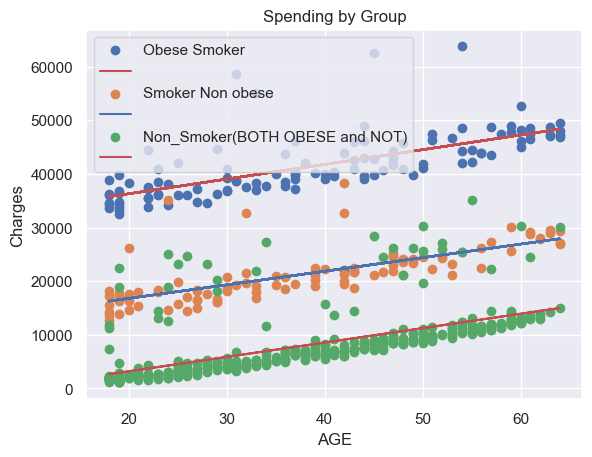

In [29]:
non_obese_smoker = dataset_not_obese[dataset_not_obese['smoker'] == 'yes']
dataset_obese_non_smoker = dataset_obese[dataset_obese['smoker']=='no']

plt.scatter(dataset_obese_smoker['age'],dataset_obese_smoker['charges'] )
z = np.polyfit(dataset_obese_smoker['age'], dataset_obese_smoker['charges'], 1)
p = np.poly1d(z)
plt.plot(dataset_obese_smoker['age'], p(dataset_obese_smoker['age']),'r')
print(p)
corr_matrix = np.corrcoef(dataset_obese_smoker['charges'], p(dataset_obese_smoker['age']))
corr = corr_matrix[0,1]
R_sq = corr**2
print("R Squared " + str(R_sq))


plt.scatter(non_obese_smoker['age'],non_obese_smoker['charges'] )
z = np.polyfit(non_obese_smoker['age'],non_obese_smoker['charges'], 1)
p = np.poly1d(z)
plt.plot(non_obese_smoker['age'], p(non_obese_smoker['age']),'b')
print(p)
corr_matrix = np.corrcoef(non_obese_smoker['charges'], p(non_obese_smoker['age']))
corr = corr_matrix[0,1]
R_sq = corr**2
print("R Squared " + str(R_sq))


plt.scatter(dataset_not_obese_non_smoker['age'],dataset_not_obese_non_smoker['charges'] )
z = np.polyfit(dataset_not_obese_non_smoker['age'],dataset_not_obese_non_smoker['charges'], 1)
p = np.poly1d(z)
plt.plot(dataset_not_obese_non_smoker['age'], p(dataset_not_obese_non_smoker['age']),'r')
print(p)
corr_matrix = np.corrcoef(dataset_not_obese_non_smoker['charges'], p(dataset_not_obese_non_smoker['age']))
corr = corr_matrix[0,1]
R_sq = corr**2
print("R Squared " + str(R_sq))


plt.legend(['Obese Smoker','','Smoker Non obese','','Non_Smoker(BOTH OBESE and NOT)',''],loc="upper left")

plt.xlabel("AGE")
plt.ylabel("Charges")
plt.title("Spending by Group")
#ax = sns.scatterplot(x=bmi, y=charges, hue=smoker)

The above graph is interesting as it shows that you can almost split the data into three groups. Obese Smokers, Non-Obese Smokers, and Non_Smokers. A slight correlation develops by age for each group. 

<h3>Box Plots</h3>

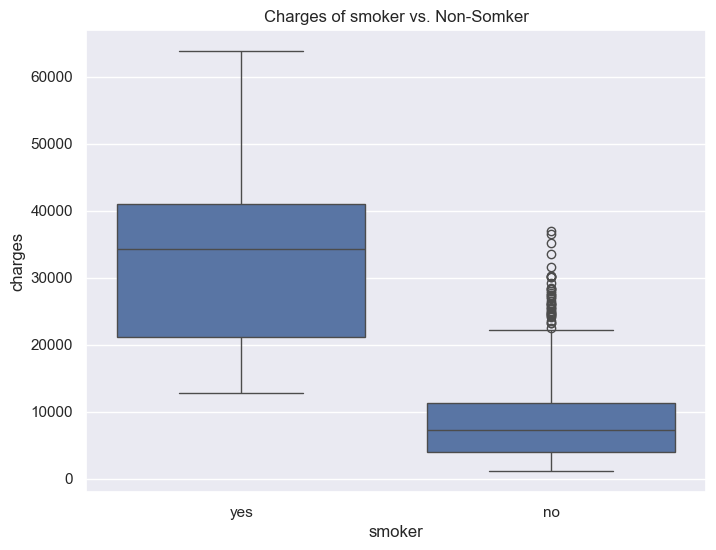

In [30]:
var = 'smoker'
data = pd.concat([health_care_data['charges'], health_care_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="charges", data=health_care_data).set(title = "Charges of smoker vs. Non-Somker")

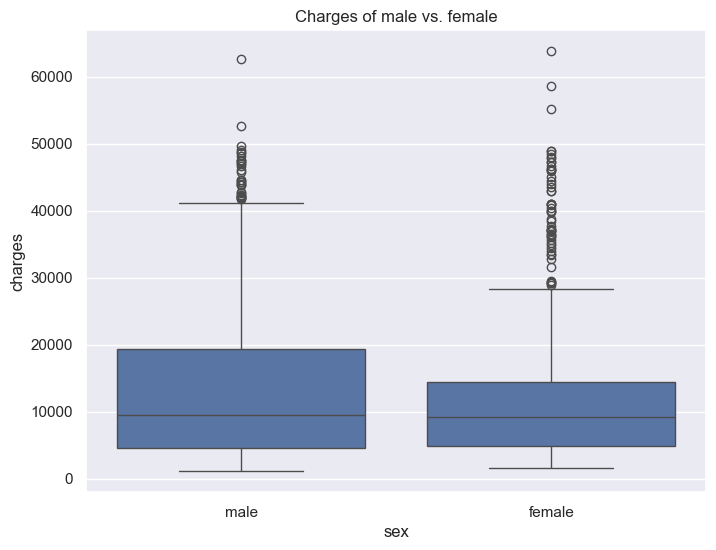

In [31]:
var = 'sex'
data = pd.concat([health_care_data['charges'], health_care_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="charges", data=health_care_data).set(title = "Charges of male vs. female")

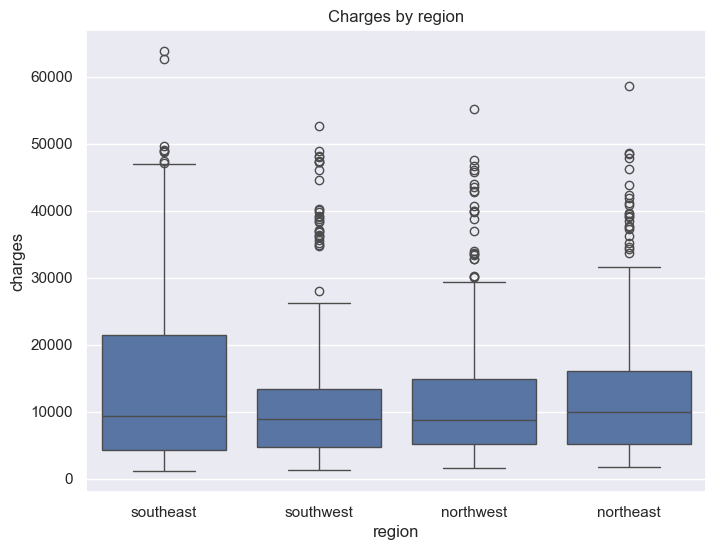

In [32]:
var = 'region'
data = pd.concat([health_care_data['charges'], health_care_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="charges", data=health_care_data).set(title = "Charges by region")

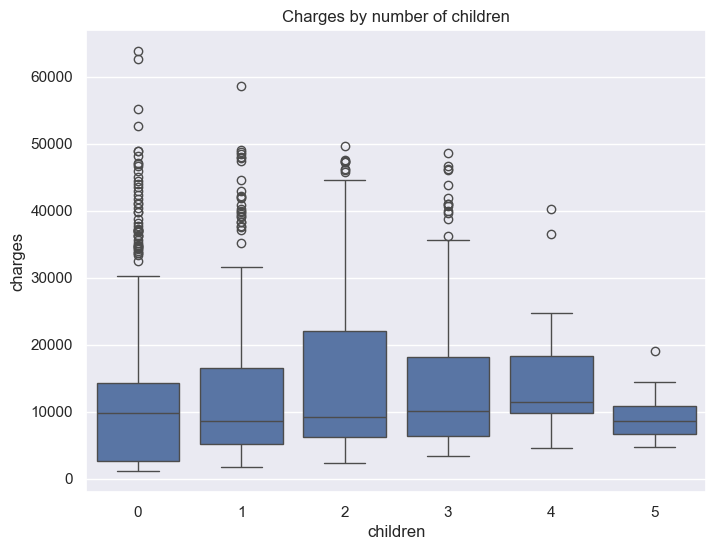

In [33]:
var = 'children'
data = pd.concat([health_care_data['charges'], health_care_data[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="charges", data=health_care_data).set(title = "Charges by number of children")

Text(0, 0.5, 'Charges ($ USD)')

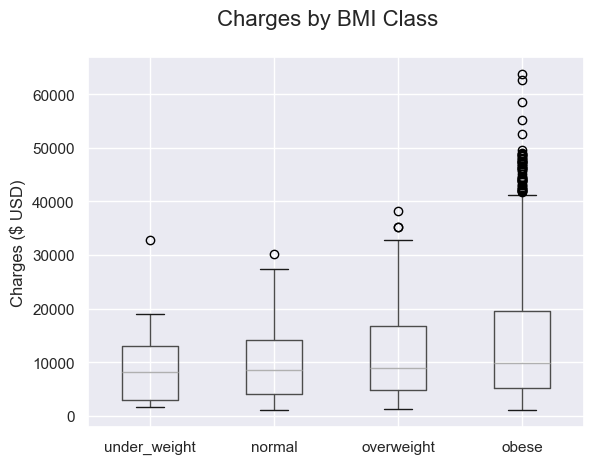

In [34]:
#count of smokers vs non_smokers

under_weight = health_care_data[health_care_data['bmi'] <18.5]
normal_weight = health_care_data[(health_care_data['bmi'] >= 18.5) & (health_care_data['bmi'] < 25.0)]
over_weight = health_care_data[(health_care_data['bmi'] >= 25.0) & (health_care_data['bmi'] < 30.0)]
obese = health_care_data[health_care_data['bmi'] >= 30.0]


#under_weight = dataset[dataset['bmi'] <18.5]['charges']
#normal_weight = dataset[(dataset['bmi'] >= 18.5) & (dataset['bmi'] < 25.0)]['charges']
#over_weight = dataset[(dataset['bmi'] >= 25.0) & (dataset['bmi'] < 30.0)]['charges']
#obese = dataset[dataset['bmi'] >= 30.0]['charges']

df = pd.concat([under_weight['charges'],normal_weight['charges'], over_weight['charges'],obese['charges'],], axis=1)
df.columns = ['under_weight','normal', 'overweight','obese']
ax = df.boxplot()
ax.get_figure().suptitle(t='Charges by BMI Class', fontsize=16);
ax.set_ylabel("Charges ($ USD)")

<h3>Swarm Plots</h3>

[Text(0.5, 1.0, 'Swarm Plot Smoker vs Non -Smoker Charges')]

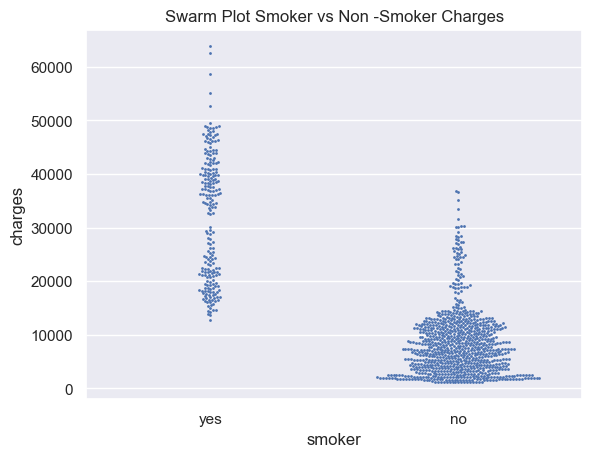

In [35]:
sns.swarmplot(data = health_care_data,x="smoker",y="charges",size = 2).set(title='Swarm Plot Smoker vs Non -Smoker Charges')

[Text(0.5, 1.0, 'Swarm Plot of number of children vs charges')]

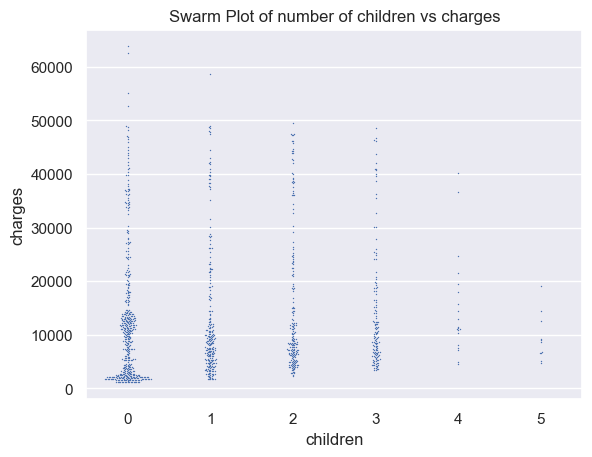

In [36]:
sns.swarmplot(data = health_care_data,x="children",y="charges",size = 1).set(title='Swarm Plot of number of children vs charges')

[Text(0.5, 1.0, 'Swarm Plot charges by region')]

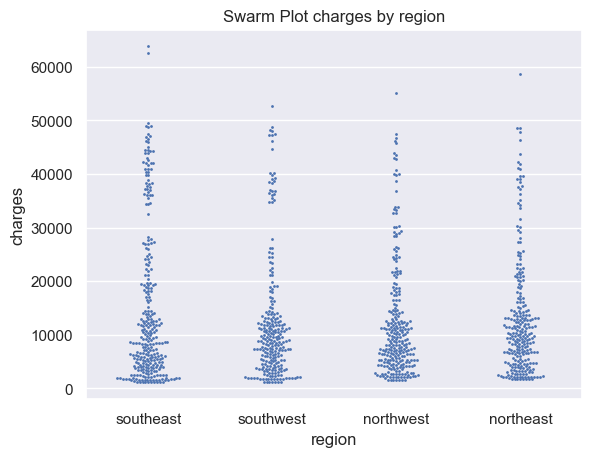

In [37]:
sns.swarmplot(data = health_care_data,x="region",y="charges",size = 2).set(title='Swarm Plot charges by region')

[Text(0.5, 1.0, 'Swarm Plot by sex')]

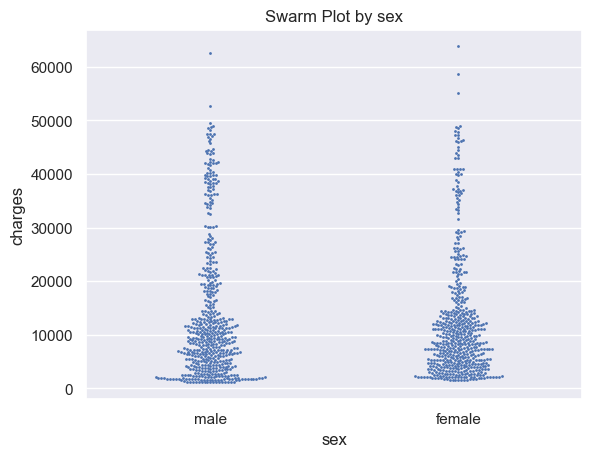

In [38]:
sns.swarmplot(data = health_care_data,x="sex",y="charges",size = 2).set(title='Swarm Plot by sex')

<h3>Correlations Plots</h3>

C:\Users\me_qu\AppData\Local\Temp\ipykernel_16040\2138963947.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'under' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  under_weight['bmi'].mask(under_weight['bmi'] >=1 ,'under', inplace=True);
C:\Users\me_qu\AppData\Local\Temp\ipykernel_16040\2138963947.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  under_weight['bmi'].mask(under_weight['bmi'] >=1 ,'under', inplace=True);
C:\Users\me_qu\AppData\Local\Temp\ipykernel_16040\2138963947.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'normal' has dtype incompatible with float64, please explicitly cast to a compatible 

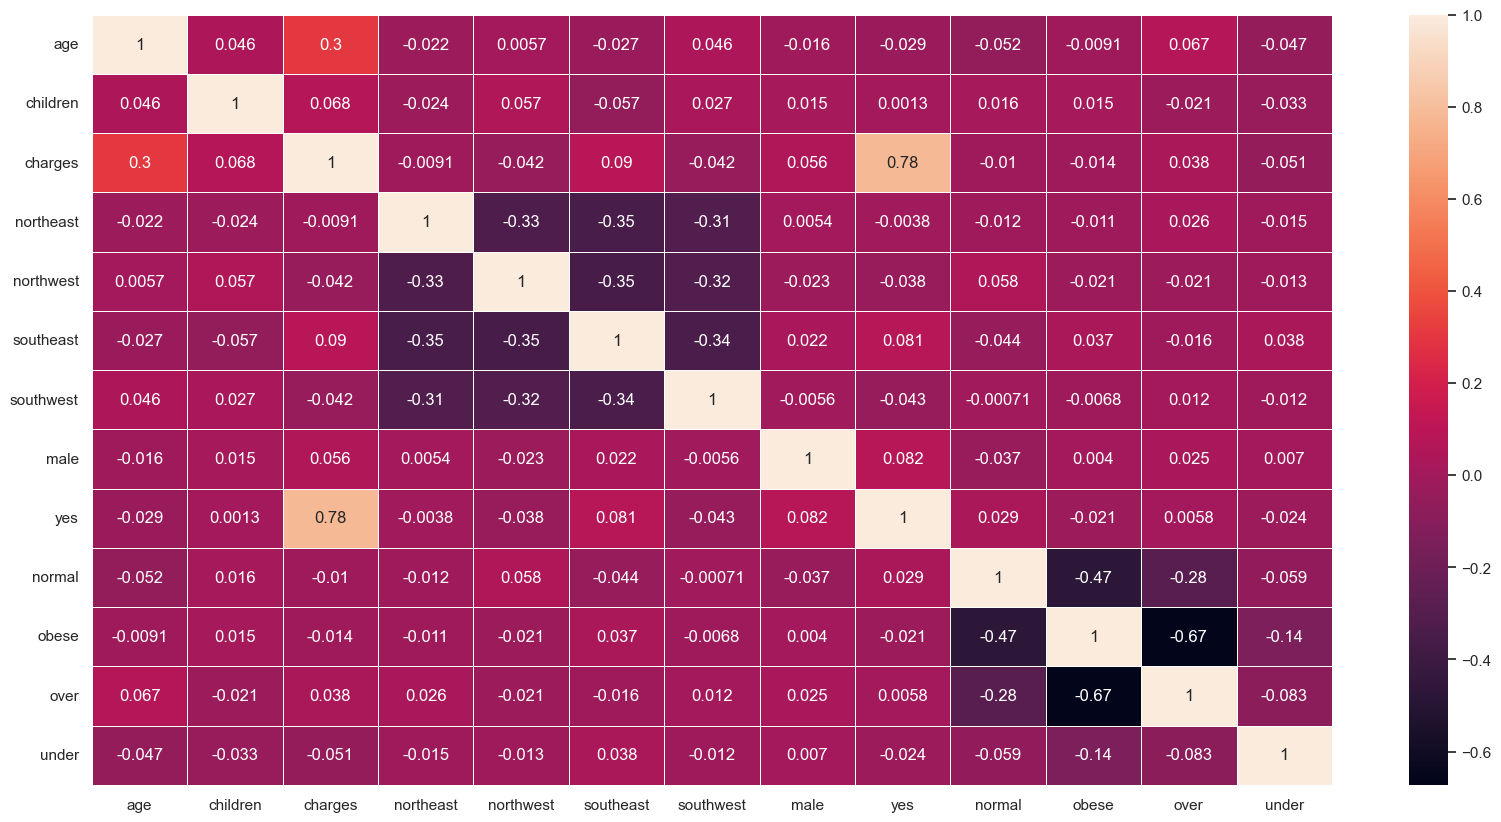

In [39]:
#sns.heatmap(df1.corr(),annot=True)
under_weight = health_care_data[health_care_data['bmi'] <18.5];
normal_weight = health_care_data[(health_care_data['bmi'] >= 18.5) & (health_care_data['bmi'] < 25.0)];
over_weight = health_care_data[(health_care_data['bmi'] >= 25.0) & (health_care_data['bmi'] < 30.0)];
obese = health_care_data[health_care_data['bmi'] >= 30.0];

under_weight['bmi'].mask(under_weight['bmi'] >=1 ,'under', inplace=True);
normal_weight['bmi'].mask(normal_weight['bmi'] >=1 ,'normal', inplace=True);
over_weight['bmi'].mask(over_weight['bmi'] >=1 ,'over', inplace=True);
obese['bmi'].mask(obese['bmi'] >=1 ,'obese', inplace=True);

male = pd.get_dummies(health_care_data['sex'],drop_first = True);
reg = pd.get_dummies(health_care_data['region'],drop_first=False);
smoke = pd.get_dummies(health_care_data['smoker'],drop_first=True);



bmis_f = pd.concat([under_weight, normal_weight,over_weight,obese], ignore_index=True, axis=0);
bmis_f = pd.get_dummies(bmis_f['bmi'],drop_first=False);

df1 = pd.concat([health_care_data,reg,male,smoke,bmis_f],axis=1);
df1.drop(['sex','bmi','smoker','region'],axis=1,inplace=True);
df1.head();

fig, ax = plt.subplots(figsize=(20,10))  ;       # Sample figsize in inches
sns.heatmap(df1.corr(), annot=True, linewidths=.5, ax=ax);

<Axes: >

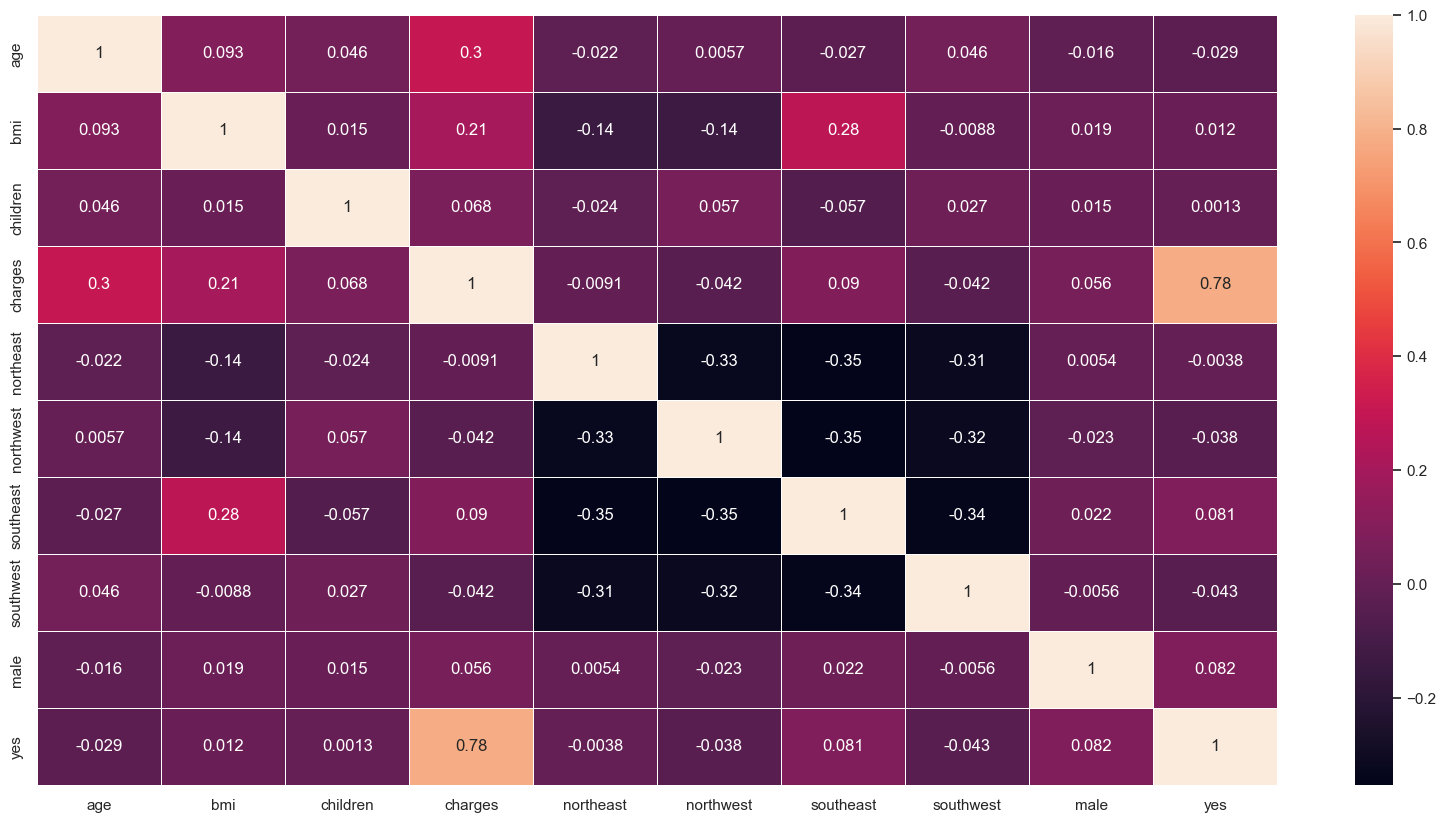

In [40]:
df2 = pd.concat([health_care_data,reg,male,smoke],axis=1)
df2.drop(['sex','smoker','region'],axis=1,inplace=True)
df2.head()
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(df2.corr(), annot=True, linewidths=.5, ax=ax)

C:\Users\me_qu\AppData\Local\Temp\ipykernel_16040\988642416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(['yes'],axis=1,inplace=True)


<Axes: >

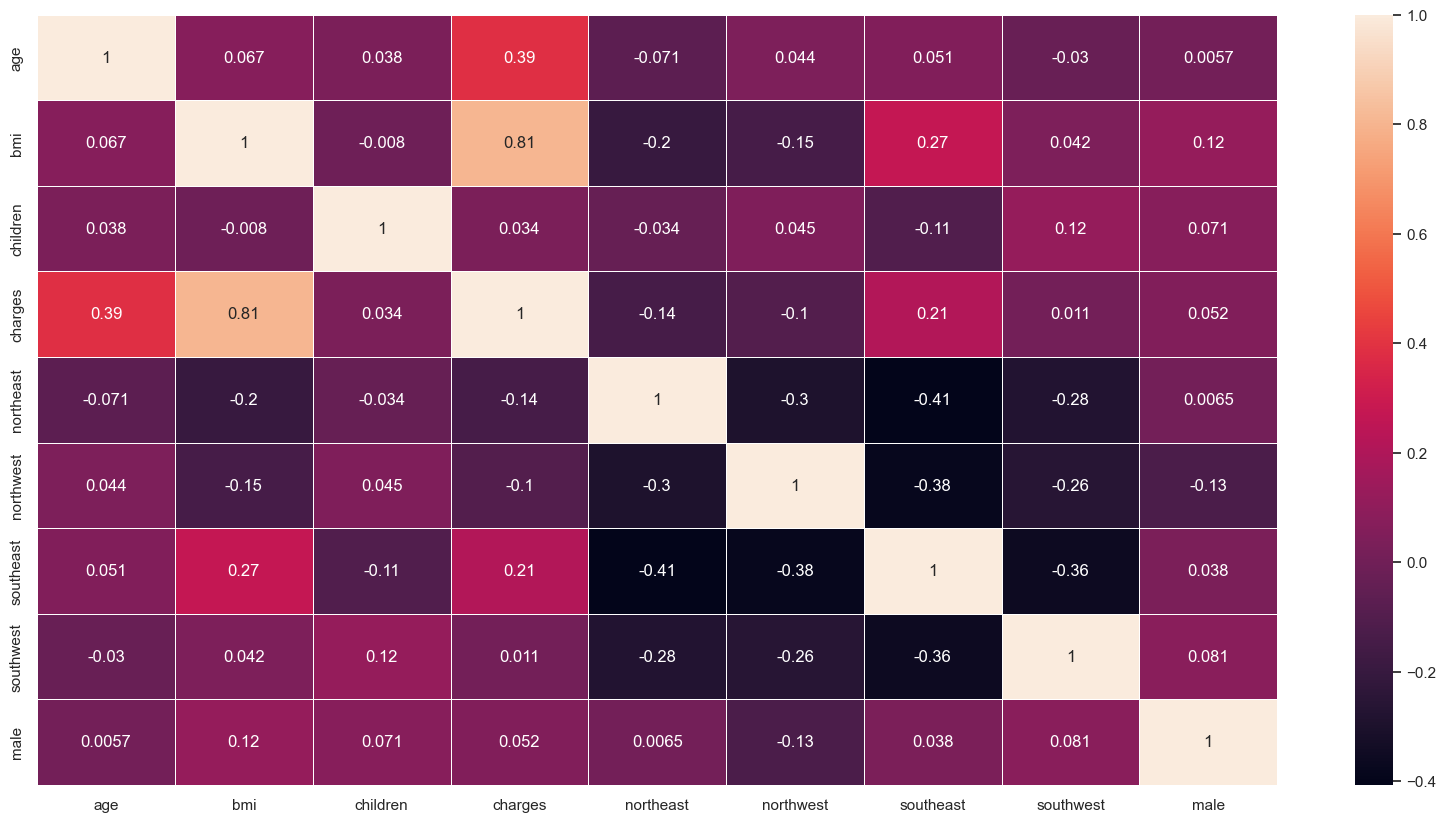

In [41]:
#SMOKERS ONLY
df3 =  df2[df2['yes']==True]
df3.head()
df3.drop(['yes'],axis=1,inplace=True)
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(df3.corr(), annot=True, linewidths=.5, ax=ax)

C:\Users\me_qu\AppData\Local\Temp\ipykernel_16040\2200776799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(['yes'],axis=1,inplace=True)


<Axes: >

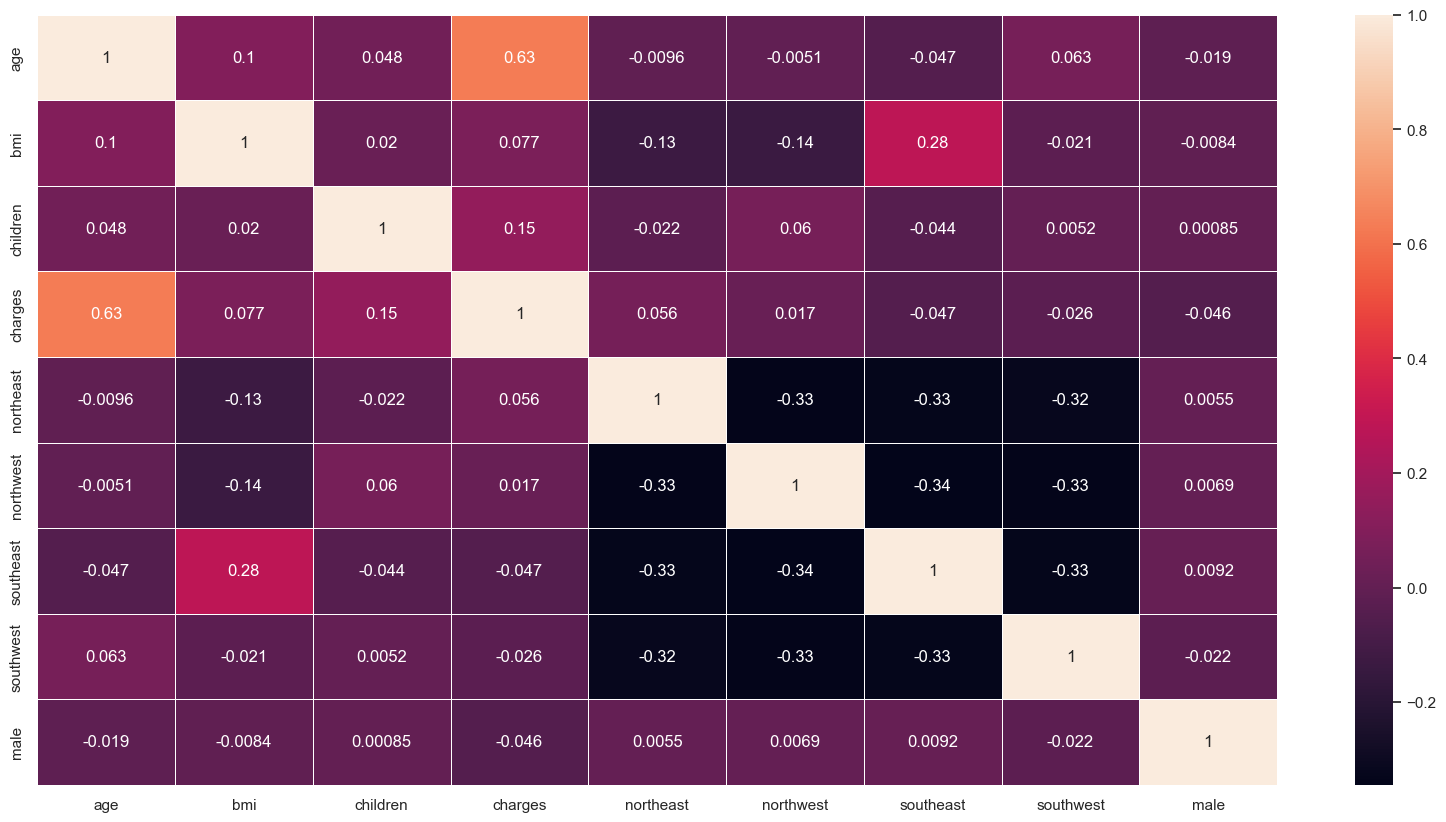

In [42]:
#NON SMOKERS ONLY
df4 =  df2[df2['yes']==False]
df4.head()
df4.drop(['yes'],axis=1,inplace=True)
fig, ax = plt.subplots(figsize=(20,10))         # Sample figsize in inches
sns.heatmap(df4.corr(), annot=True, linewidths=.5, ax=ax)

<b>Sorted Correlations</b>

In [43]:
health_care_data_num = health_care_data.copy()
health_care_data_num = health_care_data_num.drop(columns=['region', 'sex','smoker'])
corr_matrix = health_care_data_num.corr()
corr_matrix["charges"].sort_values(ascending = False)

charges     1.000000
age         0.302832
bmi         0.205227
children    0.068127
Name: charges, dtype: float64

<a id = '7'></a><h2>Statistics</h2>

In [44]:
skewness_kurtosis = health_care_data[['bmi', 'age', 'charges']].agg(['skew', 'kurt'])
skewness_kurtosis.T

,skew,kurt
bmi,0.261472,-0.087656
age,0.064121,-1.252155
charges,1.512632,1.599895


Text(0.5, 1.0, 'Charges Probability Plot')

<Figure size 640x480 with 0 Axes>

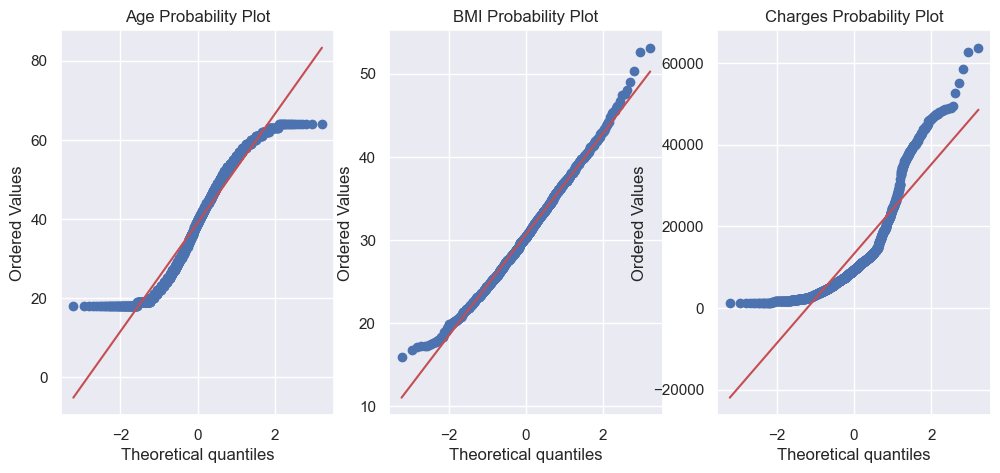

In [45]:

fig = plt.figure()
fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize = (12,5))


res = stats.probplot(health_care_data['age'], plot=ax1)
ax1.set_title('Age Probability Plot')


res = stats.probplot(health_care_data['bmi'], plot=ax2)
ax2.set_title('BMI Probability Plot')


res = stats.probplot(health_care_data['charges'], plot=ax3)
ax3.set_title('Charges Probability Plot')

Text(0.5, 1.0, 'Charges Probability Plot Log')

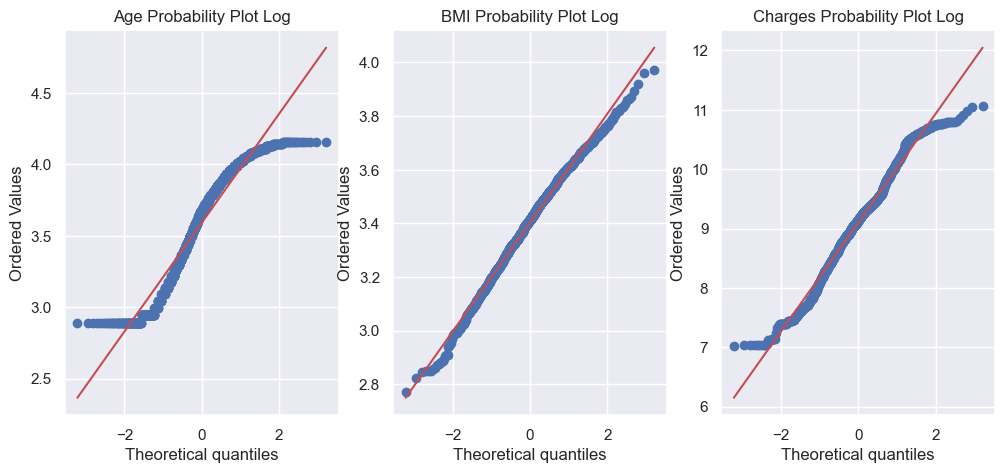

In [46]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize = (12,5))


res = stats.probplot(np.log(health_care_data['age']), plot=ax1)
ax1.set_title('Age Probability Plot Log')


res = stats.probplot(np.log(health_care_data['bmi']), plot=ax2)
ax2.set_title('BMI Probability Plot Log')


res = stats.probplot(np.log(health_care_data['charges']), plot=ax3)
ax3.set_title('Charges Probability Plot Log')

Text(0.5, 1.0, 'CHARGES')

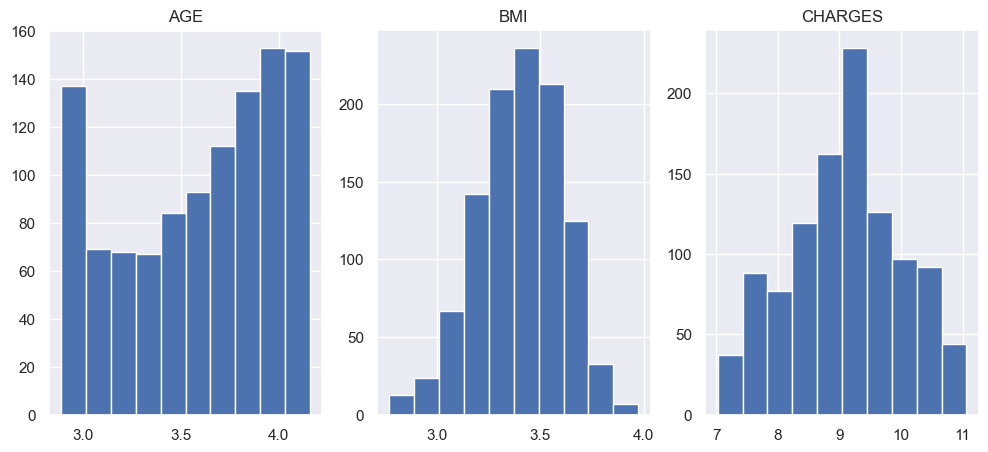

In [47]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize = (12,5))

ax1.hist(np.log(health_care_data['age']))
ax1.set_title("AGE")
ax2.hist(np.log(health_care_data['bmi']))
ax2.set_title("BMI")
ax3.hist(np.log(health_care_data['charges']))
ax3.set_title("CHARGES")

In [48]:
#Loog at the logged of these
logged= health_care_data.copy()
logged = logged[['bmi', 'age', 'charges']]
logged = np.log(logged)
skewness_kurtosis = logged[['bmi', 'age', 'charges']].agg(['skew', 'kurt'])
skewness_kurtosis.T

,skew,kurt
bmi,-0.269920,-0.162690
age,-0.362301,-1.138816
charges,-0.101701,-0.625377


<h3>Compare Smoker vs non-smoker</h3>

In [49]:
smokers = health_care_data.query("smoker=='yes'")
non_smokers = health_care_data.query("smoker=='no'")
charge_smokers = smokers['charges']
charge_non_smokers = non_smokers['charges']

print(f'Variance in charges of smokers: {np.var(charge_smokers):.2f}')
print(f'Variance in charges of non-smokers: {np.var(charge_non_smokers):.2f}')
print(f'mean in charges of smokers: ${np.mean(charge_smokers):.2f}')
print(f'mean in charges of non-smokers: ${np.mean(charge_non_smokers):.2f}')

Variance in charges of smokers: 134584142.15
Variance in charges of non-smokers: 36611815.99
mean in charges of smokers: $31858.17
mean in charges of non-smokers: $8451.39


<h4>Using T-test to compare the means of Smoker and Non-Smoker. </h4>
<p><b>H0:</b>There is no difference between charges incurred of smokers vs non-smokers.</p>
<p><b>Ha: </b>There is a significant difference between charges incurred of smokers vs non-smokers</p>

In [50]:
from scipy.stats import ttest_ind

# Perform t-test
t_statistic, p_value = ttest_ind(charge_smokers, charge_non_smokers, equal_var=False)
print(f't_statistic: {t_statistic}\np_value: {p_value}')

# Set the significance level (alpha)
alpha = 0.05

# Compare p-value with alpha and make a conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is significatnt evidence of mean charges for smokers and non-smokers are different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean charges between smokers and non-smokers.")

t_statistic: 28.923275644034785
p_value: 5.217709894999928e-82
Reject the null hypothesis: There is significatnt evidence of mean charges for smokers and non-smokers are different.


<b>Since the data is not normally distributed use the Mann-Whitney U Test.</b>

<h4>Using Mann-Whitney U test to compare the means of Smoker and Non-Smoker. </h4>
<p><b>H0:</b>There is no difference between charges incurred of smokers vs non-smokers.</p>
<p><b>Ha: </b>There is a significant difference between charges incurred of smokers vs non-smokers</p>

In [51]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(charge_smokers, charge_non_smokers, alternative='two-sided')

print(f'Mann-Whitney U statistic: {statistic}')
print(f'p_value: {p_value}')

# Compare p-value with alpha and make a conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences in health insurance costs between smokers and non-smokers.")
else:
    print("Fail to reject the null hypothesis: No significant difference between smokers and non-smokers.")

Mann-Whitney U statistic: 182593.0
p_value: 2.3081917164646985e-104
Reject the null hypothesis: There are significant differences in health insurance costs between smokers and non-smokers.


<h3>Compare Charges by sex</h3>

The males are slightly higher, however there are also more male smokers.

In [52]:
males = health_care_data.query("sex=='male'")
females = health_care_data.query("sex=='female'")
charge_males = males['charges']
charge_females = females['charges']

print(f'Variance in charges of males: {np.var(charge_males):.2f}')
print(f'Variance in charges of females: {np.var(charge_females):.2f}')
print(f'mean in charges of males: ${np.mean(charge_males):.2f}')
print(f'mean in charges of females: ${np.mean(charge_females):.2f}')

Variance in charges of males: 163989463.76
Variance in charges of females: 128429020.66
mean in charges of males: $13964.43
mean in charges of females: $12609.85


<h4>Using Mann-Whitney U test to compare the means of MALE and FEMALE. </h4>
<p><b>H0:</b>There is no difference between charges incurred of males vs females.</p>
<p><b>Ha: </b>There is a significant difference between charges incurred of males vs females</p>

In [53]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(charge_males, charge_females, alternative='two-sided')

print(f'Mann-Whitney U statistic: {statistic}')
print(f'p_value: {p_value}')

# Compare p-value with alpha and make a conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences in males and females.")
else:
    print("Fail to reject the null hypothesis: No significant difference between males and females.")

Mann-Whitney U statistic: 145656.0
p_value: 0.61479599100218
Fail to reject the null hypothesis: No significant difference between males and females.


<h3>Compare Charges by BMI category.</h3>

Note that the obese category is the highest. 

In [54]:
under_weight = health_care_data[health_care_data['bmi'] <18.5];
normal_weight = health_care_data[(health_care_data['bmi'] >= 18.5) & (health_care_data['bmi'] < 25.0)];
over_weight = health_care_data[(health_care_data['bmi'] >= 25.0) & (health_care_data['bmi'] < 30.0)];
obese = health_care_data[health_care_data['bmi'] >= 30.0];

under_weight_charges = under_weight['charges']
normal_weight_charges = normal_weight['charges']
over_weight_charges = over_weight['charges']
obese_charges = obese['charges']

print(f'Variance in charges of under_weight: {np.var(under_weight_charges):.2f}')
print(f'Variance in charges of normal_weiht: {np.var(normal_weight_charges):.2f}')
print(f'Variance in charges of over_weight: {np.var(over_weight_charges):.2f}')
print(f'Variance in charges of obese: {np.var(obese_charges):.2f}')


print(f'mean in charges of under weight: ${np.mean(under_weight_charges):.2f}')
print(f'mean in charges of normal weight: ${np.mean(normal_weight_charges):.2f}')
print(f'mean in charges of over weight: ${np.mean(over_weight_charges):.2f}')
print(f'mean in charges of obese: ${np.mean(obese_charges):.2f}')

Variance in charges of under_weight: 58736616.61
Variance in charges of normal_weiht: 52360186.93
Variance in charges of over_weight: 64571113.73
Variance in charges of obese: 212875425.56
mean in charges of under weight: $9516.18
mean in charges of normal weight: $10130.42
mean in charges of over weight: $11229.65
mean in charges of obese: $15518.98


<h4>Using One-Way ANOVA to compare the means of groups. </h4>
<p><b>H0:</b>There is no difference in a person's BMI class to the amount of charges.</p>
<p><b>Ha: </b>There is significant difference in a person's BMI class to the amount of charges.</p>

In [55]:
statistic, p_value = f_oneway(under_weight_charges, normal_weight_charges, over_weight_charges, obese_charges)
#sig diff p is very small
print(f'F-STAT: {statistic}')
print(f'p_value: {p_value}')
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences in BMI categoires.")
else:
    print("Fail to reject the null hypothesis: No significant difference betweenBMI categoires.")

F-STAT: 14.517363351892334
p_value: 2.8415469488581233e-09
Reject the null hypothesis: There are significant differences in BMI categoires.


<h3>Compare Charges by Region category.</h3>

In [56]:
southwest_cost = health_care_data[health_care_data['region'] == "southwest"] ["charges"]
southeast_cost = health_care_data[health_care_data['region'] == "southeast"] ["charges"]
northwest_cost = health_care_data[health_care_data['region'] == "northwest"] ["charges"]
northeast_cost = health_care_data[health_care_data['region'] == "northeast"] ["charges"]

print(f'Variance in charges of southwest: {np.var(southwest_cost):.2f}')
print(f'Variance in charges of southeast: {np.var(southeast_cost):.2f}')
print(f'Variance in charges of northwest: {np.var(northwest_cost):.2f}')
print(f'Variance in charges of northeat: {np.var(northeast_cost):.2f}')


print(f'mean in charges of southwest: ${np.mean(southwest_cost):.2f}')
print(f'mean in charges of southeast: ${np.mean(southeast_cost):.2f}')
print(f'mean in charges of northwest: ${np.mean(northwest_cost):.2f}')
print(f'mean in charges of northeast: ${np.mean(northeast_cost):.2f}')

Variance in charges of southwest: 131527943.24
Variance in charges of southeast: 205668120.57
Variance in charges of northwest: 115553643.38
Variance in charges of northeat: 121661375.96
mean in charges of southwest: $12372.06
mean in charges of southeast: $15056.70
mean in charges of northwest: $12397.58
mean in charges of northeast: $13091.48


<h4>Using One-Way ANOVA to compare the means of groups. </h4>
<p><b>H0:</b> There is no difference in the region a person lives to amount of charges.</p>
<p><b>Ha: </b>There is a significant difference in the region a person lives to amount of charges.</p>

In [57]:
statistic, p_value = f_oneway(southwest_cost, southeast_cost, northwest_cost, northeast_cost)

print(f'F-STAT: {statistic}')
print(f'p_value: {p_value}')
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences in region categoires.")
else:
    print("Fail to reject the null hypothesis: No significant difference between REGION categoires.")

F-STAT: 3.0741628207263787
p_value: 0.026903684220952177
Reject the null hypothesis: There are significant differences in region categoires.


<h3>Compare Charges by children number category.</h3>

In [58]:
zero_child_cost = health_care_data[health_care_data['children'] == 0] ["charges"]
one_child_cost = health_care_data[health_care_data['children'] == 1] ["charges"]
two_child_cost = health_care_data[health_care_data['children'] == 2] ["charges"]
three_child_cost = health_care_data[health_care_data['children'] == 3] ["charges"]
four_child_cost = health_care_data[health_care_data['children'] == 4] ["charges"]
five_child_cost = health_care_data[health_care_data['children'] == 5] ["charges"]

print(f'Variance in charges of 0 children: {np.var(zero_child_cost):.2f}')
print(f'Variance in charges of 1 child: {np.var(one_child_cost):.2f}')
print(f'Variance in charges of 2 children: {np.var(two_child_cost):.2f}')
print(f'Variance in charges of 3 children: {np.var(three_child_cost):.2f}')
print(f'Variance in charges of 4 children: {np.var(four_child_cost):.2f}')
print(f'Variance in charges of 5 children: {np.var(five_child_cost):.2f}')


print(f'mean in charges of 0 children: ${np.mean(zero_child_cost):.2f}')
print(f'mean in charges of 1 child: ${np.mean(one_child_cost):.2f}')
print(f'mean in charges of 2 children: ${np.mean(two_child_cost):.2f}')
print(f'mean in charges of 3 children: ${np.mean(three_child_cost):.2f}')
print(f'mean in charges of 4 children: ${np.mean(four_child_cost):.2f}')
print(f'mean in charges of 5 children: ${np.mean(five_child_cost):.2f}')

Variance in charges of 0 children: 144416456.82
Variance in charges of 1 child: 144048543.21
Variance in charges of 2 children: 172986014.11
Variance in charges of 3 children: 127668461.76
Variance in charges of 4 children: 86914390.85
Variance in charges of 5 children: 17460170.65
mean in charges of 0 children: $12283.26
mean in charges of 1 child: $13002.95
mean in charges of 2 children: $15392.01
mean in charges of 3 children: $14203.28
mean in charges of 4 children: $15106.42
mean in charges of 5 children: $9342.41


<h4>Using One-Way Anova to compare the means of groups. </h4>
<p><b>H0:</b> There is no difference in the number of children a person has to amount of charges.</p>
<p><b>Ha: </b>There is significant difference in the number of children a person has to amount of charges.</p>

In [59]:
statistic, p_value = f_oneway(zero_child_cost, one_child_cost, two_child_cost, three_child_cost,four_child_cost,five_child_cost)

print(f'F-STAT: {statistic}')
print(f'p_value: {p_value}')
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences in child categoires.")
else:
    print("Fail to reject the null hypothesis: No significant difference between child categoires.")

F-STAT: 2.3379917074363314
p_value: 0.04002751598197055
Reject the null hypothesis: There are significant differences in child categoires.


<a id = '8'></a><h2>Building a Model</h2>

In [60]:
health_care_data

,age,sex,bmi,children,smoker,region,charges
109,63,male,35.090,0,yes,southeast,47055.53210
1136,44,female,25.000,1,no,southwest,7623.51800
184,44,male,30.690,2,no,southeast,7731.42710
1053,47,male,29.800,3,yes,southwest,25309.48900
591,47,male,19.570,1,no,northwest,8428.06930
...,...,...,...,...,...,...,...
173,35,female,34.800,1,no,southwest,5246.04700
739,29,male,35.500,2,yes,southwest,44585.45587
473,47,female,33.345,0,no,northeast,20878.78443
456,55,female,30.140,2,no,southeast,11881.96960


In [61]:
s = (health_care_data.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['sex', 'smoker', 'region']


In [62]:
#health_care_data['smoker'] = health_care_data['smoker'].map({'yes': 1, 'no': 0})
health_care_data.head()


,age,sex,bmi,children,smoker,region,charges
109,63,male,35.09,0,yes,southeast,47055.5321
1136,44,female,25.00,1,no,southwest,7623.5180
184,44,male,30.69,2,no,southeast,7731.4271
1053,47,male,29.80,3,yes,southwest,25309.4890
591,47,male,19.57,1,no,northwest,8428.0693


<h4>Encode sex and smoker. Smoker: 1 is yes, 0 no. Sex: Male = 1, Female = 0</h4>

In [63]:


#Binary encode Male/Female, Smoker/Non_Smoker
binary_encoded_health_data = health_care_data.copy()
binary_encoded_health_data['smoker'] = binary_encoded_health_data['smoker'].apply(
    lambda x: 1 if x == 'yes' else (0 if x == 'no' else None))
binary_encoded_health_data['sex'] = binary_encoded_health_data['sex'].apply(
    lambda x: 1 if x == 'male' else (0 if x == 'female' else None))
health_care_data_cleaned = binary_encoded_health_data

#Create dummy variables for region
health_care_data_charges = health_care_data_cleaned['charges']
health_care_data_no_charge = health_care_data_cleaned.drop(['charges'],axis = 1)
#health_care_data_no_charge.head()
df3 = pd.get_dummies(health_care_data_no_charge, 
                     columns = ['region'],dtype = int)
df3 = df3.drop(['region_southwest'] ,axis = 1)
df3['charges'] = health_care_data_charges
health_care_data_enc = df3


#scale
ss = StandardScaler()
age_stand_sc = ss.fit_transform(np.array(health_care_data_enc['age']).reshape(-1,1))
bmi_stand_sc = ss.fit_transform(np.array(health_care_data_enc['bmi']).reshape(-1,1))
charge_stand_sc = ss.fit_transform(np.array(health_care_data_enc['charges']).reshape(-1,1))
health_care_data_enc['age'] = age_stand_sc
health_care_data_enc['bmi'] = bmi_stand_sc
health_care_data_enc['charges'] = charge_stand_sc
final_transformed_array = health_care_data_enc.copy()


In [64]:
health_care_data_enc.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,charges
109,1.697239,1,0.726503,0,1,0,0,1,2.788741
1136,0.350970,0,-0.928595,1,0,0,0,0,-0.467605
184,0.350970,1,0.004755,2,0,0,0,1,-0.458693
1053,0.563539,1,-0.141234,3,1,0,0,0,0.992925
591,0.563539,1,-1.819298,1,0,0,1,0,-0.401164


In [65]:
ss = StandardScaler()
age_stand_sc = ss.fit_transform(np.array(health_care_data_enc['age']).reshape(-1,1))
bmi_stand_sc = ss.fit_transform(np.array(health_care_data_enc['bmi']).reshape(-1,1))
charge_stand_sc = ss.fit_transform(np.array(health_care_data_enc['charges']).reshape(-1,1))
health_care_data_enc['age'] = age_stand_sc
health_care_data_enc['bmi'] = bmi_stand_sc
health_care_data_enc['charges'] = charge_stand_sc
final_transformed_array = health_care_data_enc.copy()

In [66]:
final_transformed_array.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,charges
109,1.697239,1,0.726503,0,1,0,0,1,2.788741
1136,0.350970,0,-0.928595,1,0,0,0,0,-0.467605
184,0.350970,1,0.004755,2,0,0,0,1,-0.458693
1053,0.563539,1,-0.141234,3,1,0,0,0,0.992925
591,0.563539,1,-1.819298,1,0,0,1,0,-0.401164


In [67]:
X_train = final_transformed_array.iloc[:,0:-1]
y_train = final_transformed_array.iloc[:,-1]
X_train.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast
109,1.697239,1,0.726503,0,1,0,0,1
1136,0.350970,0,-0.928595,1,0,0,0,0
184,0.350970,1,0.004755,2,0,0,0,1
1053,0.563539,1,-0.141234,3,1,0,0,0
591,0.563539,1,-1.819298,1,0,0,1,0


In [68]:
y_train.head()

109     2.788741
1136   -0.467605
184    -0.458693
1053    0.992925
591    -0.401164
Name: charges, dtype: float64

In [69]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [70]:
some_data_x = X_train.iloc[:5]
some_data_x.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast
109,1.697239,1,0.726503,0,1,0,0,1
1136,0.350970,0,-0.928595,1,0,0,0,0
184,0.350970,1,0.004755,2,0,0,0,1
1053,0.563539,1,-0.141234,3,1,0,0,0
591,0.563539,1,-1.819298,1,0,0,1,0


In [71]:
some_data_x = X_train.iloc[:5]
some_data_x.head()
some_data_y = y_train.iloc[:5]
some_data_y.head()

109     2.788741
1136   -0.467605
184    -0.458693
1053    0.992925
591    -0.401164
Name: charges, dtype: float64

In [72]:
ss.inverse_transform(np.array(lin_reg.predict(some_data_x)).reshape(-1,1))

array([[ 2.12450136],
       [-0.49137712],
       [-0.28309253],
       [ 1.73101939],
       [-0.54355219]])

In [73]:
#Average error

train_preds = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train,train_preds)
lin_rmse = np.sqrt(lin_mse)
ss.inverse_transform(np.array(lin_rmse).reshape(-1,1))

array([[0.50021395]])

In [74]:

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

train_preds = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train,train_preds)
tree_rmse = np.sqrt(tree_mse)
ss.inverse_transform(np.array(tree_rmse).reshape(-1,1))

array([[0.04081216]])

In [75]:

forest_reg = RandomForestRegressor(n_estimators = 100,max_depth = 50,min_samples_leaf = 1,max_features =3,max_leaf_nodes = 950)
forest_reg.fit(X_train,y_train)

train_preds = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train,train_preds)
forest_rmse = np.sqrt(forest_mse)
ss.inverse_transform(np.array(forest_rmse).reshape(-1,1))

array([[0.1508964]])

In [76]:

xg_reg = XGBRegressor(n_estimators =200,
                      learning_rate=1,
                      n_jobs =4,
                      max_depth = 5,
                      gamma=0)
xg_reg.fit(X_train,y_train)

train_preds = xg_reg.predict(X_train)
xg_mse = mean_squared_error(y_train,train_preds)
xg_rmse = np.sqrt(xg_mse)
ss.inverse_transform(np.array(xg_rmse).reshape(-1,1))

array([[0.04087648]])

In [77]:

numerical_feature= ['bmi', 'children','age']
categorical_nominal= ['region']

categorical_biner = ['sex','smoker']
sex_values = ['female','male']
smoker_values = ['no','yes']

enc_1 = OrdinalEncoder(categories=[sex_values, smoker_values],
                     dtype='int8')

enc_2 = OneHotEncoder(sparse=False,dtype='int8')


numerical_pipeline= Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', MinMaxScaler())
])

categorical_biner_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoding_ohe', enc_1),
])

categorical_nominal_pipepline= Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoding_ohe', enc_2),
])

In [78]:
preproc_pipeline= ColumnTransformer(
    [
        ('num_pipeline',numerical_pipeline, numerical_feature),
        ('encoder_biner',categorical_biner_pipeline, categorical_biner),
        ('encoder_nominal',categorical_nominal_pipepline, categorical_nominal)
    ],
    remainder='passthrough',
    verbose=True
)

In [79]:
convert_pipeline = Pipeline([('preprocessor', preproc_pipeline)])

In [80]:
X_train = health_care_data.iloc[:,0:-1]
y_train = health_care_data.iloc[:,-1]
X_test = strat_test_set.iloc[:,0:-1]
y_test = strat_test_set.iloc[:,-1]


X_train.head()
X_train_new= convert_pipeline.fit_transform(X_train)
X_test_new= convert_pipeline.transform(X_test)

[ColumnTransformer] .. (1 of 3) Processing num_pipeline, total=   0.0s
[ColumnTransformer] . (2 of 3) Processing encoder_biner, total=   0.0s
[ColumnTransformer]  (3 of 3) Processing encoder_nominal, total=   0.0s


C:\Users\me_qu\PycharmProjects\Minecraft_Automation\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [81]:
encoded_columns = preproc_pipeline.named_transformers_['encoder_nominal'].\
                  get_feature_names_out(categorical_nominal)

columns= (list(numerical_feature) + list(categorical_biner) + list(encoded_columns))

X_train_new = pd.DataFrame(X_train_new,columns=columns)
X_test_new = pd.DataFrame(X_test_new,columns=columns)

In [82]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bmi               1070 non-null   float64
 1   children          1070 non-null   float64
 2   age               1070 non-null   float64
 3   sex               1070 non-null   float64
 4   smoker            1070 non-null   float64
 5   region_northeast  1070 non-null   float64
 6   region_northwest  1070 non-null   float64
 7   region_southeast  1070 non-null   float64
 8   region_southwest  1070 non-null   float64
dtypes: float64(9)
memory usage: 75.4 KB


In [83]:
X_train_new.reset_index(drop=True, inplace=True)
X_test_new.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [84]:
class ModelEvaluator:
    def __init__(self, train_actual=None, train_predicted=None, test_actual=None, test_predicted=None,ci_calc = 0.95):
        self.train_actual = train_actual
        self.train_predicted = train_predicted
        self.test_actual = test_actual
        self.test_predicted = test_predicted
        self.confidence = ci_calc

    def get_errors(self, y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        rmse = mean_squared_error(y_true, y_pred, squared=False)
        mape = mean_absolute_percentage_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        squared_errors = (y_pred - y_true)**2
        ci_rmse = np.sqrt(stats.t.interval(self.confidence,len(squared_errors)-1,
                                           loc = squared_errors.mean(),
                                           scale = stats.sem(squared_errors)))

        abs_errors = abs(y_pred - y_true)
        ci_mae = np.array(stats.t.interval(self.confidence,len(abs_errors)-1,
                                   loc = abs_errors.mean(),
                                   scale = stats.sem(abs_errors)))
        error_dataframe = {
            'MAE': mae,
            '95%-CI-MAE': ci_mae.round(2),
            'RMSE': rmse,
            '95%-CI-RMSE': ci_rmse.round(2),
            'MAPE': mape,
            'R-squared': r2.round(2)
        }
        return error_dataframe 

    def evaluate(self):
        errors = {}

        if self.train_actual is not None and self.train_predicted is not None:
            train_errors = self.get_errors(self.train_actual, self.train_predicted)
            errors['Train'] = train_errors

        if self.test_actual is not None and self.test_predicted is not None:
            test_errors = self.get_errors(self.test_actual, self.test_predicted)
            errors['Test'] = test_errors

        return pd.DataFrame(errors)

In [85]:
X_train

,age,sex,bmi,children,smoker,region
109,63,male,35.090,0,yes,southeast
1136,44,female,25.000,1,no,southwest
184,44,male,30.690,2,no,southeast
1053,47,male,29.800,3,yes,southwest
591,47,male,19.570,1,no,northwest
...,...,...,...,...,...,...
173,35,female,34.800,1,no,southwest
739,29,male,35.500,2,yes,southwest
473,47,female,33.345,0,no,northeast
456,55,female,30.140,2,no,southeast


In [86]:
health_data_train = pd.concat([X_train_new, y_train], axis=1)
health_data_train.head()

,bmi,children,age,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,0.514662,0.0,0.978261,1.0,1.0,0.0,0.0,1.0,0.0,47055.5321
1,0.243207,0.2,0.565217,0.0,0.0,0.0,0.0,0.0,1.0,7623.5180
2,0.396287,0.4,0.565217,1.0,0.0,0.0,0.0,1.0,0.0,7731.4271
3,0.372343,0.6,0.630435,1.0,1.0,0.0,0.0,0.0,1.0,25309.4890
4,0.097121,0.2,0.630435,1.0,0.0,0.0,1.0,0.0,0.0,8428.0693


In [87]:
y_train

0       47055.53210
1        7623.51800
2        7731.42710
3       25309.48900
4        8428.06930
           ...     
1065     5246.04700
1066    44585.45587
1067    20878.78443
1068    11881.96960
1069     7265.70250
Name: charges, Length: 1070, dtype: float64

XGB

In [88]:
xg_reg_1 = XGBRegressor(n_estimators =4,
                      learning_rate=1,
                      n_jobs =8,
                      max_depth = 4,
                      gamma=0)
xg_reg_1.fit(X_train_new,y_train)

y_train_pred= xg_reg_1.predict(X_train_new)
y_test_pred= xg_reg_1.predict(X_test_new)
evaluator_both = ModelEvaluator(train_actual=y_train, train_predicted= y_train_pred,
                                 test_actual=y_test, test_predicted=y_test_pred)

evaluator_both.evaluate().round(2)

,Train,Test
MAE,2357.720112,2539.84663
95%-CI-MAE,"[2162.58, 2552.86]","[2074.88, 3004.82]"
RMSE,4016.421423,4619.710148
95%-CI-RMSE,"[3623.4, 4374.27]","[3608.29, 5446.44]"
MAPE,0.268935,0.285333
R-squared,0.89,0.85


Random Forest Regression

In [89]:
forest_reg_1 = RandomForestRegressor(n_estimators = 100,max_depth = 50,min_samples_leaf = 1,max_features =3,max_leaf_nodes = 950)
forest_reg_1.fit(X_train_new,y_train)

y_train_pred= forest_reg_1.predict(X_train_new)
y_test_pred= forest_reg_1.predict(X_test_new)
evaluator_both = ModelEvaluator(train_actual=y_train, train_predicted= y_train_pred,
                                 test_actual=y_test, test_predicted=y_test_pred)

evaluator_both.evaluate().round(2)

,Train,Test
MAE,1024.925421,2648.997476
95%-CI-MAE,"[937.44, 1112.41]","[2179.84, 3118.15]"
RMSE,1781.945955,4709.272352
95%-CI-RMSE,"[1608.67, 1939.81]","[3706.02, 5533.53]"
MAPE,0.127711,0.309561
R-squared,0.98,0.85


DecTree

In [90]:
tree_reg_1 = DecisionTreeRegressor()
tree_reg_1.fit(X_train_new,y_train)

y_train_pred= tree_reg_1.predict(X_train_new)
y_test_pred= tree_reg_1.predict(X_test_new)
evaluator_both = ModelEvaluator(train_actual=y_train, train_predicted= y_train_pred,
                                 test_actual=y_test, test_predicted=y_test_pred)

evaluator_both.evaluate().round(2)

C:\Users\me_qu\AppData\Local\Temp\ipykernel_16040\3949872504.py:16: RuntimeWarning: invalid value encountered in sqrt
  ci_rmse = np.sqrt(stats.t.interval(self.confidence,len(squared_errors)-1,


,Train,Test
MAE,29.572515,2982.865469
95%-CI-MAE,"[-0.03, 59.18]","[2312.46, 3653.27]"
RMSE,494.205984,6312.935857
95%-CI-RMSE,"[nan, 708.66]","[5281.1, 7198.36]"
MAPE,0.008472,0.282251
R-squared,1.0,0.73


<h4>Linear Regression</h4>

In [91]:
lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_train_new,y_train)

y_train_pred= lin_reg_1.predict(X_train_new)
y_test_pred= lin_reg_1.predict(X_test_new)
evaluator_both = ModelEvaluator(train_actual=y_train, train_predicted= y_train_pred,
                                 test_actual=y_test, test_predicted=y_test_pred)

evaluator_both.evaluate().round(2)

,Train,Test
MAE,4230.068443,4097.059358
95%-CI-MAE,"[3969.88, 4490.26]","[3569.55, 4624.57]"
RMSE,6057.232064,5995.968662
95%-CI-RMSE,"[5653.52, 6435.67]","[5163.39, 6726.27]"
MAPE,0.4329,0.396474
R-squared,0.75,0.75


<h4>SVR</h4>

In [92]:

svm_reg_1 = svm.SVR()
svm_reg_1.fit(X_train_new,y_train)

y_train_pred= svm_reg_1.predict(X_train_new)
y_test_pred= svm_reg_1.predict(X_test_new)
evaluator_both = ModelEvaluator(train_actual=y_train, train_predicted= y_train_pred,
                                 test_actual=y_test, test_predicted=y_test_pred)
evaluator_both.evaluate().round(2)

,Train,Test
MAE,8333.919732,8307.070797
95%-CI-MAE,"[7757.6, 8910.24]","[7153.85, 9460.29]"
RMSE,12715.175476,12673.056609
95%-CI-RMSE,"[11840.79, 13533.19]","[10842.84, 14270.44]"
MAPE,1.0187,0.993992
R-squared,-0.1,-0.1



Grid Search for XGBOOST

In [93]:
xg_reg_1 = XGBRegressor(n_estimators =4,
                      learning_rate=1,
                      n_jobs =8,
                      max_depth = 4,
                      gamma=0)
xg_reg_1.fit(X_train_new,y_train)

y_train_pred= xg_reg_1.predict(X_train_new)
y_test_pred= xg_reg_1.predict(X_test_new)
evaluator_both = ModelEvaluator(train_actual=y_train, train_predicted= y_train_pred,
                                 test_actual=y_test, test_predicted=y_test_pred)

evaluator_both.evaluate().round(2)

,Train,Test
MAE,2357.720112,2539.84663
95%-CI-MAE,"[2162.58, 2552.86]","[2074.88, 3004.82]"
RMSE,4016.421423,4619.710148
95%-CI-RMSE,"[3623.4, 4374.27]","[3608.29, 5446.44]"
MAPE,0.268935,0.285333
R-squared,0.89,0.85


In [94]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [95]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1);
rf_random.fit(X_train_new,y_train);
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\me_qu\PycharmProjects\Minecraft_Automation\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
165 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\me_qu\PycharmProjects\Minecraft_Automation\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\me_qu\PycharmProjects\Minecraft_Automation\venv\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\me_qu\PycharmProjects\Minecraft_Automation\venv\lib\site-packages\sklea

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [96]:
print(rf_random.best_params_)

{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


In [97]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [98]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_new, y_test)

Model Performance
Average Error: 2676.4589 degrees.
Accuracy = 68.08%.


In [99]:
forest_reg_1 = RandomForestRegressor(n_estimators = 400,min_samples_split = 5,min_samples_leaf = 2,max_features = 'sqrt',max_depth = 10, bootstrap = False)
forest_reg_1.fit(X_train_new,y_train)

y_train_pred= forest_reg_1.predict(X_train_new)
y_test_pred= forest_reg_1.predict(X_test_new)
evaluator_both = ModelEvaluator(train_actual=y_train, train_predicted= y_train_pred,
                                 test_actual=y_test, test_predicted=y_test_pred)

evaluator_both.evaluate().round(2)

,Train,Test
MAE,1506.401424,2559.086389
95%-CI-MAE,"[1370.02, 1642.78]","[2092.7, 3025.47]"
RMSE,2726.382442,4640.090514
95%-CI-RMSE,"[2439.31, 2985.99]","[3614.67, 5476.77]"
MAPE,0.1919,0.300306
R-squared,0.95,0.85


In [100]:
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
print(rmse)

4640.090514305146


In [101]:

confidence = 0.95
squared_errors = (y_test_pred - y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([3614.66975315, 5476.77300402])

In [102]:
xg_params = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [103]:
XG = XGBRegressor()
XG_random = RandomizedSearchCV(estimator = XG, param_distributions = xg_params, n_iter = 50, cv = 5, verbose=2, n_jobs = -1);
XG_random.fit(X_train_new,y_train);
XG_random.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}

In [104]:
print(rf_random.best_params_)

{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}


In [105]:
xg_reg_1 = XGBRegressor(n_estimators =140,
                      learning_rate=0.05,
                      max_depth = 3)
xg_reg_1.fit(X_train_new,y_train)

y_train_pred= xg_reg_1.predict(X_train_new)
y_test_pred= xg_reg_1.predict(X_test_new)
evaluator_both = ModelEvaluator(train_actual=y_train, train_predicted= y_train_pred,
                                 test_actual=y_test, test_predicted=y_test_pred)

evaluator_both.evaluate().round(2)

,Train,Test
MAE,2205.211529,2389.840746
95%-CI-MAE,"[2002.83, 2407.59]","[1940.53, 2839.16]"
RMSE,4029.267121,4429.033405
95%-CI-RMSE,"[3591.3, 4424.09]","[3383.13, 5271.35]"
MAPE,0.266718,0.277872
R-squared,0.89,0.87


<a id = '9'></a><h2>Final Model </h2>

In [106]:
confidence = 0.95
squared_errors = (y_test_pred - y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([3383.12932615, 5271.3480022 ])

In [107]:
final_model = XGBRegressor(n_estimators =140,
                      learning_rate=0.05,
                      max_depth = 3)
final_model.fit(X_train_new,y_train)

y_train_pred= final_model.predict(X_train_new)
final_predictions= final_model.predict(X_test_new)
evaluator_both = ModelEvaluator(train_actual=y_train, train_predicted= y_train_pred,
                                 test_actual=y_test, test_predicted=y_test_pred)

evaluator_both.evaluate().round(2)

,Train,Test
MAE,2205.211529,2389.840746
95%-CI-MAE,"[2002.83, 2407.59]","[1940.53, 2839.16]"
RMSE,4029.267121,4429.033405
95%-CI-RMSE,"[3591.3, 4424.09]","[3383.13, 5271.35]"
MAPE,0.266718,0.277872
R-squared,0.89,0.87


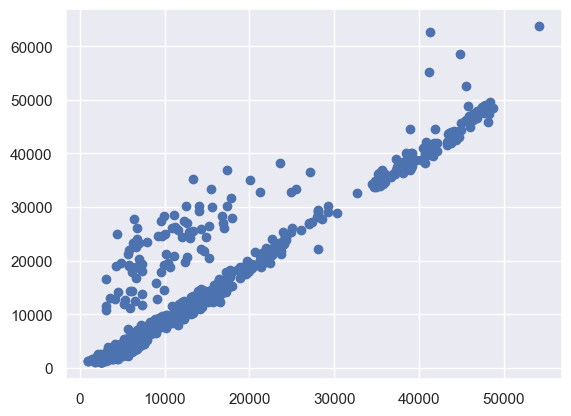

In [108]:
plt.scatter(y_train_pred,y_train)

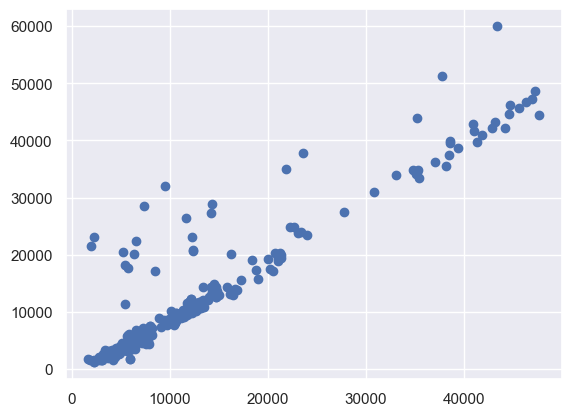

In [109]:
plt.scatter(final_predictions,y_test)

In [110]:

confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))

array([3383.12932615, 5271.3480022 ])

In [111]:
# confidence = 0.95
abs_errors = abs(final_predictions - y_test)
(stats.t.interval(confidence,len(abs_errors)-1,
                         loc = abs_errors.mean(),
                         scale = stats.sem(abs_errors)))

(1940.525675482086, 2839.155816822602)

In [112]:
filename = 'finalized_health_charges_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

In [113]:
def load_model(filename):
    return pickle.load(open(filename, 'rb'))
final_model = load_model('finalized_health_charges_model.sav')
final_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=140, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<a id = '10'></a><h2>Conclusions</h2>

<p>The XGBRegressor was used as the final model. The model can be built and predictions made within a MAE of 2389.840746 with a 95% CI of (1940.525675482086, 2839.155816822602). Smoking contributes greatly to increased charges. A person that is both obese and a smoker will incur the greatest charges. All variables were used in building the model, as they appeared to increase accuracy in the model.</p>

<h3>Summary</h3>
<ol>
    <li>Data was received for insured persons. The data consisted of various attributes and a target of charges to predict.</li>
    <li>The data was split to avoid snooping bias and a EDA conducted.</li>
    <li>Data was visualized in various ways.</li>
    <li>Several models were tried.</li>
    <li>A final model was selected.</li>
    <li>Model gave an MAE of 2389.840746 with a 95% CI of (1940.525675482086, 2839.155816822602).</li>
</ol>


<h3>Recommendations</h3>
<p></p>It is recommended that the company collect more variables to ensure more accurate prediction of the charges. Variables such as diabetes status, heart disease, other chronic conditions that could contribute to the charges. This will reduced risk and ensure higher accuracy for predicting the charges that will be incurred by a person.</p>

<a id = '11'></a><h2>References</h2>

<p>First, a book that helped tremendously is Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems.</p>
<p>A great help from this notebook: <a href = "https://www.kaggle.com/code/sardiirfansyah/health-insurance-top-eda-prediction-part-1/notebook#notebook-container"</a>Health Insurance - Top EDA & Prediction | Part-1 by Sardi Irfansyah</p> 
<p>Dataset: <a href = "https://www.kaggle.com/datasets/mirichoi0218/insurance">here</a></p>
<p>Citations</p>

<ul>
    <li>[1]A. Geron, Hands-On Machine Learning With Scikit-Learn, Keras, And Tensorflow 3E. S.L.: O’reilly Uk Limited, 2022.</li>
    <li>[2]S. Irfansyah, “Health Insurance - Top EDA & Prediction | Part-1,” kaggle.com, Aug. 22, 2023. https://www.kaggle.com/code/sardiirfansyah/health-insurance-top-eda-prediction-part-1/notebook#notebook-container (accessed Dec. 28, 2023).</li>
    <li>[3]“Medical Cost Personal Datasets,” www.kaggle.com. https://www.kaggle.com/datasets/mirichoi0218/insurance</li>
</ul>
